## Get all the costs results :

In [37]:
import pandas as pd
#sourceCPLEX = "D:/DTU-Courses/DTU-Thesis/berth_allocation/MCBAP-multi-port-berth-allocation-problem/results_jobs/benchmarks_CPLEX/CPLEX_N4_N15_results_5min.csv"
sourceCPLEX = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_CPLEX/CPLEX_NLarge_results_2400s_all.csv"
sourceHeur = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_HEUR"
algo_folder="finalGRASP"
expnb=5
exp="GRASPpath1"
Nmin=11
Nmax=15

def get_results_cost(type):
    dataCPLEX = pd.read_csv(sourceCPLEX)
    if type == 'large':
        dataHeur = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/NLarge_concatenete.csv")
    else:
        for i in range(Nmin, Nmax):
            this_dataHeur = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/N{i}_N{i}.csv")
            dataHeur = pd.concat([dataHeur, this_dataHeur], ignore_index=True)
    merged_df = pd.merge(dataCPLEX, dataHeur, how='inner', on=['Seed', 'N', 'Nout', 'qli'])
    merged_df["diff"] = (merged_df["HeurCost"] - merged_df["CPLEX"])/merged_df["CPLEX"]*100
    if type == 'large':
        merged_df.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/Large_diff_{exp}.csv", index=False)
    else:
        merged_df.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/N{Nmin}_N{Nmax}_diff{exp}.csv", index=False)
    return merged_df
merged_df = get_results_cost('large')


In [20]:
mean_diff = merged_df.groupby(['N', 'Nout'])['diff'].mean().reset_index()
mean_diff

,N,Nout,diff
0,0,0,NaN
1,30,5,6.595612


In [21]:
mean_diff = merged_df.groupby(['N', 'Nout'])['diff'].mean().reset_index()
mean_diff

,N,Nout,diff
0,0,0,NaN
1,30,5,6.595612


## Get results in json :

In [22]:
from getdict_results import *

In [23]:
seed=2
Nin=30
qli=10
Nout=5

## Get vizualization from the sol 

In [24]:
file = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_CPLEX/sols_2400s/CPLEX_sol_{}_{}_{}_{}.csv".format(seed,Nin,Nout,qli)
results_sol = pd.read_csv(file)
listx=list(results_sol[results_sol['first']=='x']['second'])[0].replace(' ','').split('\n')

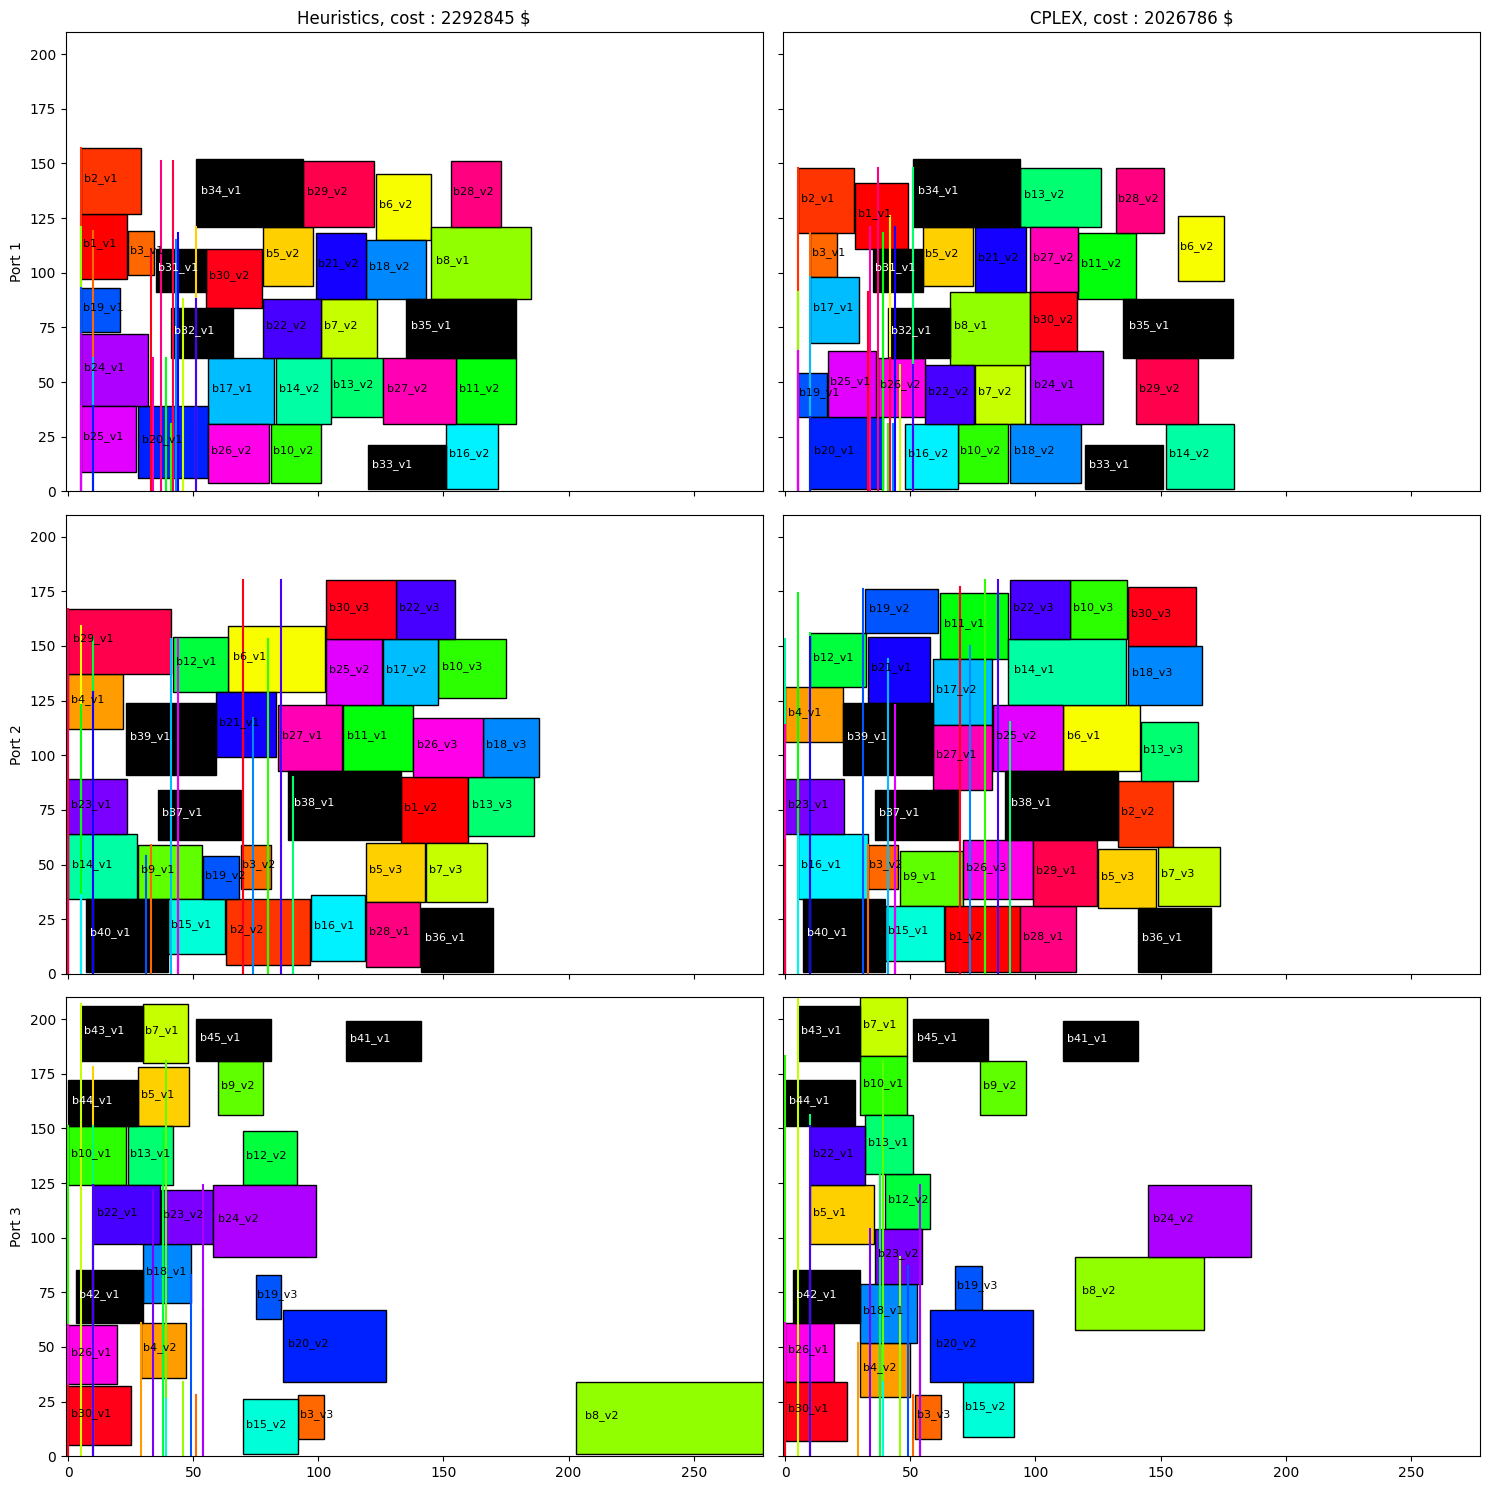

In [25]:
from make_graphs import *
getgraphs_port(algo_folder, exp, seed,Nin,Nout,qli, 'large', 5)

## Cost evolution :

In [38]:
dataset = make_datasetiterSoft(algo_folder=algo_folder, exp=exp, seed=seed,Nin=Nin,Nout=Nout,qli=qli)
#for col in ['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit','n','c', 'when']:
#    dataset[col] = dataset[col].astype(int)

In [39]:
dataset.rename(columns={
    'objectif': 'Total Cost',
    'delay_cost_sollocal': 'Delay Cost',
    'penalty_sollocal': 'Penalty',
    'fuel_cost_sollocal': 'Fuel Cost',
    'handling_cost_sollocal': 'Handling Cost',
    'waiting_cost_sollocal': 'Waiting Cost'
}, inplace=True)

> Here we have the global breakdown cost over all the iterations for the instance chosen :

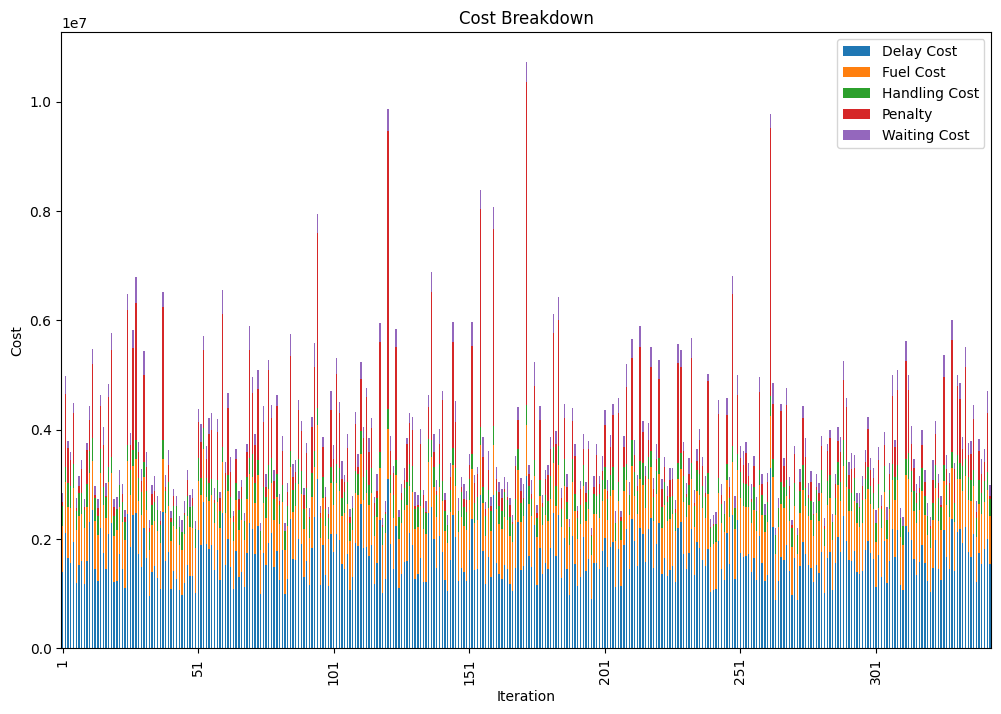

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# create dataset
dataset_subset = dataset[dataset['iter'] <= max(dataset['iter'])]
# create pivot table for solocal columns
df_pivot_solocal = pd.pivot_table(dataset_subset, values=['Delay Cost', 'Penalty', 'Fuel Cost', 'Handling Cost', 'Waiting Cost'], index=['iter'])


# create stacked bar plot for solocal columns
ax1 = df_pivot_solocal.plot(kind='bar', stacked=True, figsize=(12, 8))

# Specify the frequency of the tick labels
nth_label = 50
ticks = ax1.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax1.xaxis.get_ticklabels()]
ax1.xaxis.set_ticks(ticks[::nth_label])
ax1.xaxis.set_ticklabels(ticklabels[::nth_label])

# add labels and title for solocal columns
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax1.set_title('Cost Breakdown')

# show plots
plt.show()


In [29]:
len(dataset)

343

### Cost when better :

In [30]:
dataset['better']

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
338    0.0
339    0.0
340    0.0
341    0.0
342    0.0
Name: better, Length: 343, dtype: float64

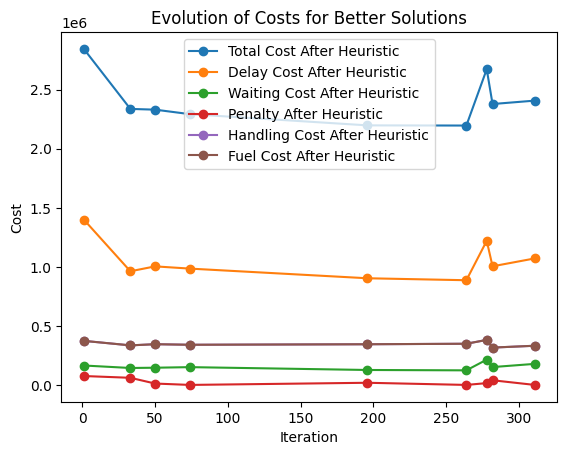

In [31]:
    import pandas as pd
    import matplotlib.pyplot as plt

    # Filtering the dataset where the 'better' column equals 1
    better_solutions = dataset[dataset['better'] == 1]

    # Extracting relevant columns for plotting
    iterations = better_solutions['iter']
    cost_solheur = better_solutions['Total Cost']
    delay_cost_solheur = better_solutions['Delay Cost']
    waiting_cost_solheur = better_solutions['Waiting Cost']
    penalty_solheur = better_solutions['Penalty']
    handling_cost_solheur = better_solutions['Handling Cost']
    fuel_cost_solheur = better_solutions['Handling Cost']

    # Plotting the lines
    plt.plot(iterations, cost_solheur, label='Total Cost After Heuristic', marker='o')
    plt.plot(iterations, delay_cost_solheur, label='Delay Cost After Heuristic', marker='o')
    plt.plot(iterations, waiting_cost_solheur, label='Waiting Cost After Heuristic', marker='o')
    plt.plot(iterations, penalty_solheur, label='Penalty After Heuristic', marker='o')
    plt.plot(iterations, handling_cost_solheur, label='Handling Cost After Heuristic', marker='o')
    plt.plot(iterations, fuel_cost_solheur, label='Fuel Cost After Heuristic', marker='o')

    # Adding titles and labels
    plt.title('Evolution of Costs for Better Solutions')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.legend()

    # Show plot
    plt.show()



In [32]:
dataset[dataset['better'] == 1]

,iter,inst,Total Cost,chosen_tacticoneboat,chosen_reversed,chosen_tacticallboats,chosen_reversedtacticallboats,chosen_tacticlocalsearch,chosen_indexoneship,chosen_indexallship,...,allboatscost,rateconstained,failed,better,reconstruct,pathrelinking,usedLocalSearch,average_cost_elite,average_dist_elite,pushimprove
0,1,NaN,2.845315e+06,"41 cost Name: second, dtype: object","26 yes Name: second, dtype: object","12 cost Name: second, dtype: object","40 cost Name: second, dtype: object","3 cost Name: second, dtype: object","2 2 Name: second, dtype: object","28 1 Name: second, dtype: object",...,"[0.25, 0.25, 0.25, 0.25]","[0.25, 0.25, 0.25, 0.25]",0.0,1.0,0.0,0,0,0.0,0.0,0
32,33,NaN,2.337320e+06,"41 cost Name: second, dtype: object","26 no Name: second, dtype: object","12 time Name: second, dtype: object","40 cost Name: second, dtype: object","3 dist Name: second, dtype: object","2 1 Name: second, dtype: object","28 1 Name: second, dtype: object",...,"[0.23546131827368622, 0.2666427497214085, 0.22...","[0.25, 0.25, 0.25, 0.25]",0.0,1.0,0.0,0,0,0.0,0.0,0
49,50,NaN,2.330991e+06,"41 cost Name: second, dtype: object","26 no Name: second, dtype: object","12 time Name: second, dtype: object","40 time Name: second, dtype: object","3 cost Name: second, dtype: object","2 1 Name: second, dtype: object","28 4 Name: second, dtype: object",...,"[0.28161927871841136, 0.2971940297356295, 0.20...","[0.25, 0.25, 0.25, 0.25]",0.0,1.0,0.0,0,0,0.0,0.0,0
73,74,NaN,2.292844e+06,"41 cost Name: second, dtype: object","26 no Name: second, dtype: object","12 time Name: second, dtype: object","40 dist Name: second, dtype: object","3 time Name: second, dtype: object","2 1 Name: second, dtype: object","28 1 Name: second, dtype: object",...,"[0.2166809181750944, 0.3047684400027959, 0.239...","[0.25, 0.25, 0.25, 0.25]",0.0,1.0,0.0,0,0,0.0,0.0,0
195,196,NaN,2.197932e+06,"41 cost Name: second, dtype: object","26 no Name: second, dtype: object","12 time Name: second, dtype: object","40 time Name: second, dtype: object","3 cost Name: second, dtype: object","2 1 Name: second, dtype: object","28 1 Name: second, dtype: object",...,"[0.19903325894457866, 0.3086288418035848, 0.24...","[0.25, 0.25, 0.25, 0.25]",0.0,1.0,0.0,0,0,0.0,0.0,0
263,264,NaN,2.196422e+06,"41 cost Name: second, dtype: object","26 no Name: second, dtype: object","12 time Name: second, dtype: object","40 time Name: second, dtype: object","3 cost Name: second, dtype: object","2 1 Name: second, dtype: object","28 1 Name: second, dtype: object",...,"[0.2818430276659649, 0.28024969252556037, 0.25...","[0.25, 0.25, 0.25, 0.25]",0.0,1.0,0.0,0,0,0.0,0.0,0
277,278,NaN,2.673270e+06,"41 time Name: second, dtype: object","26 no Name: second, dtype: object","12 cost Name: second, dtype: object","40 dist Name: second, dtype: object","3 time Name: second, dtype: object","2 1 Name: second, dtype: object","28 3 Name: second, dtype: object",...,"[0.333333291769593, 0.333333291769593, 1.24691...","[0.25, 0.25, 0.25, 0.25]",0.0,1.0,0.0,0,0,0.0,0.0,0
281,282,NaN,2.378647e+06,"41 cost Name: second, dtype: object","26 no Name: second, dtype: object","12 dist Name: second, dtype: object","40 cost Name: second, dtype: object","3 time Name: second, dtype: object","2 1 Name: second, dtype: object","28 4 Name: second, dtype: object",...,"[0.26892601284227413, 0.24440117594462338, 0.2...","[0.25, 0.25, 0.25, 0.25]",0.0,1.0,0.0,0,0,0.0,0.0,0
310,311,NaN,2.407473e+06,"41 cost Name: second, dtype: object","26 no Name: second, dtype: object","12 cost Name: second, dtype: object","40 time Name: second, dtype: object","3 time Name: second, dtype: object","2 1 Name: second, dtype: object","28 4 Name: second, dtype: object",...,"[0.4999998026383361, 0.4999998026383361, 1.870...","[0.25, 0.25, 0.25, 0.25]",0.0,1.0,0.0,0,0,0.0,0.0,0


In [33]:
len(dataset)

343

### Cost comparison for multiple instance :

In [16]:
seed=2
Nin=30
qli=10
Nout=5
dataset2_30_10_5 = make_datasetiterSoft(algo_folder=algo_folder, exp=exp, seed=seed,Nin=Nin,Nout=Nout,qli=qli)
dataset2_30_10_5['inst']="30_10_5"


In [20]:
seed=2
Nin=30
qli=20
Nout=5
dataset2_30_20_5 = make_datasetiterSoft(algo_folder=algo_folder, exp=exp, seed=seed,Nin=Nin,Nout=Nout,qli=qli)
dataset2_30_20_5['inst']="30_20_5"

In [21]:
seed=2
Nin=30
qli=40
Nout=5
dataset2_30_40_5 = make_datasetiterSoft(algo_folder=algo_folder, exp=exp, seed=seed,Nin=Nin,Nout=Nout,qli=qli)
dataset2_30_40_5['inst']="2_30_40_5"

In [22]:
seed=2
Nin=30
qli=80
Nout=5
dataset2_30_80_5 = make_datasetiterSoft(algo_folder=algo_folder, exp=exp, seed=seed,Nin=Nin,Nout=Nout,qli=qli)
dataset2_30_80_5['inst']="30_80_5"

In [24]:
dataset2_30_10_5['inst']="30_10_5"
dataset2_30_20_5['inst']="30_20_5"
dataset2_30_40_5['inst']="30_40_5"
dataset2_30_80_5['inst']="30_80_5"

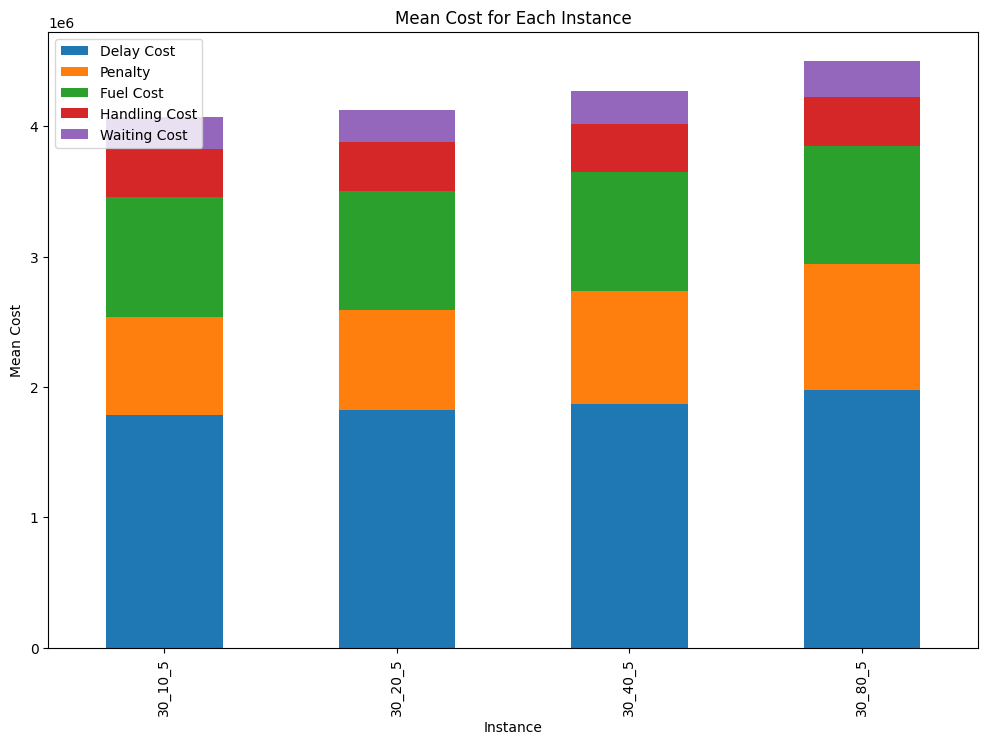

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# Concatenate the datasets into a single DataFrame
all_datasets = pd.concat([dataset2_30_10_5, dataset2_30_10_5, dataset2_30_20_5, dataset2_30_40_5, dataset2_30_80_5])
all_datasets.rename(columns={
    'cost_sollocal': 'Total Cost',
    'delay_cost_sollocal': 'Delay Cost',
    'penalty_sollocal': 'Penalty',
    'fuel_cost_sollocal': 'Fuel Cost',
    'handling_cost_sollocal': 'Handling Cost',
    'waiting_cost_sollocal': 'Waiting Cost'
}, inplace=True)

all_datasets.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/alldatasets_comp_5.csv", index=False)

# Concatenate the datasets into a single DataFrame
#all_datasets = pd.concat([dataset2_30_10_10, dataset2_30_10_10, dataset2_30_20_10, dataset2_30_40_10, dataset2_30_80_10])
#all_datasets.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/alldatasets_comp_5.csv", index=False)

#all_datasets = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/alldatasets_comp.csv")


# Group by the 'inst' column and calculate the mean for each type of cost
mean_costs = all_datasets.groupby('inst').agg({
    'Delay Cost': 'mean',
    'Penalty': 'mean',
    'Fuel Cost': 'mean',
    'Handling Cost': 'mean',
    'Waiting Cost': 'mean'
}).reset_index()

# Plot the bar plot
mean_costs.plot(x='inst', kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Instance')
plt.ylabel('Mean Cost')
plt.title('Mean Cost for Each Instance')

# Show plot
plt.show()


In [25]:
dataset["chosen_indexallship"]

0      28    1
Name: second, dtype: object
1      28    4
Name: second, dtype: object
2      28    3
Name: second, dtype: object
3      28    1
Name: second, dtype: object
4      28    3
Name: second, dtype: object
                      ...                 
338    28    3
Name: second, dtype: object
339    28    3
Name: second, dtype: object
340    28    4
Name: second, dtype: object
341    28    3
Name: second, dtype: object
342    28    1
Name: second, dtype: object
Name: chosen_indexallship, Length: 343, dtype: object

## Parameters analysis

### Evolution of specific parameters :

In [19]:
dataset.columns

Index(['iter', 'inst', 'Total Cost', 'chosen_tacticoneboat', 'chosen_reversed',
       'chosen_tacticallboats', 'chosen_reversedtacticallboats',
       'chosen_tacticlocalsearch', 'chosen_indexoneship',
       'chosen_indexallship', 'chosen_indexreversedallship',
       'chosen_indexrateconstrained', 'chosen_indexproptoremove',
       'cost_solheur', 'delay_cost_solheur', 'waiting_cost_solheur',
       'penalty_solheur', 'handling_cost_solheur', 'fuel_cost_solheur',
       'cost_sollocal', 'Delay Cost', 'Waiting Cost', 'Penalty',
       'Handling Cost', 'Fuel Cost', 'timeheur', 'timelocal',
       'proba_tacticboat', 'proba_tacticall', 'proba_tacticlocalsearch',
       'oneboatdistance', 'oneboatcost', 'oneboattime', 'allboatsdist',
       'allboatstime', 'allboatscost', 'rateconstained', 'failed', 'better',
       'reconstruct', 'pathrelinking', 'usedLocalSearch', 'average_cost_elite',
       'average_dist_elite', 'pushimprove'],
      dtype='object')

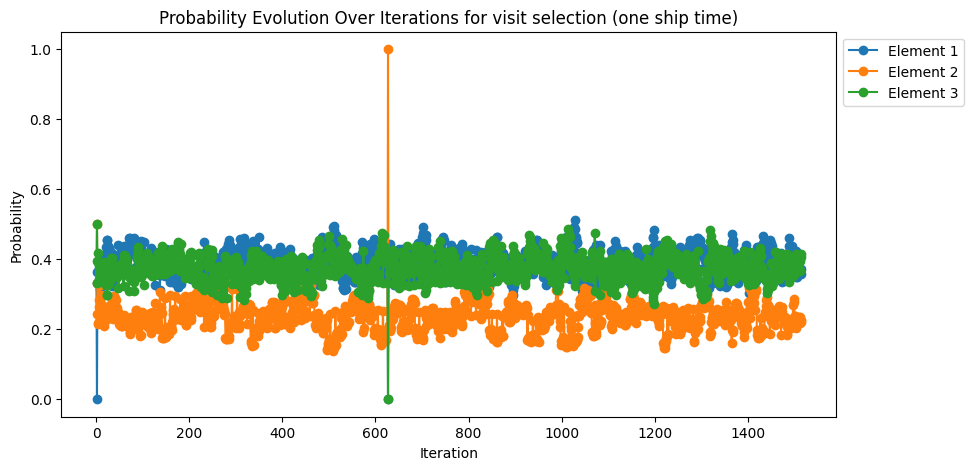

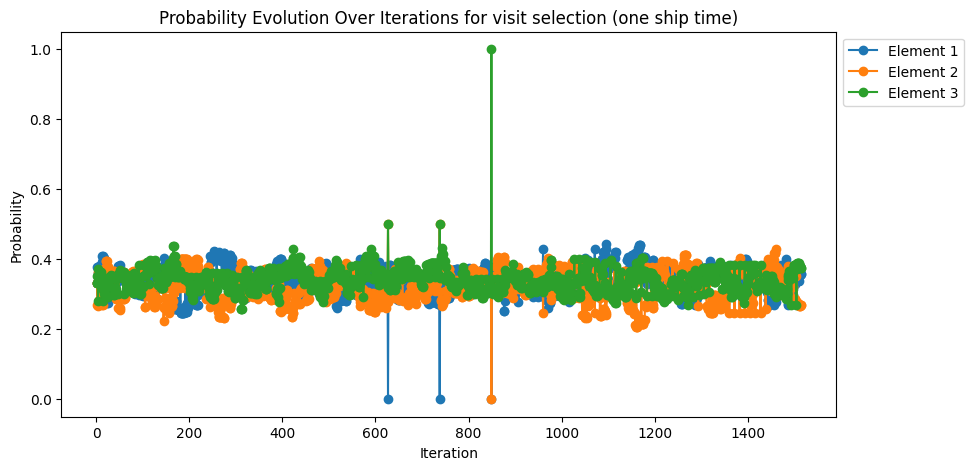

In [20]:
import matplotlib.pyplot as plt

# Group by 'iter' and extract the relevant columns
average_probabilities = dataset.groupby('iter').agg({
    'proba_tacticboat': 'first',
    'proba_tacticall': 'first'
}).reset_index()

# Extract the relevant columns for plotting
iterations = average_probabilities['iter']
proba_boat = average_probabilities['proba_tacticboat']
proba_all = average_probabilities['proba_tacticall']

# List of columns to plot
columns_to_plot = ['proba_tacticboat', 'proba_tacticall']
# Loop through the columns
for column_name, probabilities in zip(columns_to_plot, [proba_boat, proba_all]):
    
    # Determine the number of elements in the lists
    num_elements = len(probabilities.iloc[0])
    
    # Create a new figure for each column
    plt.figure(figsize=(10, 5))
    
    # Loop through each element in the lists
    for element_idx in range(num_elements):
        
        # Extract the probability element across all iterations
        element_probabilities = [prob_list[element_idx] for prob_list in probabilities]
        
        # Plot the probability evolution of each element in the list
        plt.plot(iterations, element_probabilities, marker='o', label=f'Element {element_idx+1}')
    
    # Adding titles and labels
    plt.title(f'Probability Evolution Over Iterations for visit selection (one ship time)')
    plt.xlabel('Iteration')
    plt.ylabel('Probability')
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))

    # Show plot
    plt.show()


### Which cost for which parameter :

In [28]:
dataset["chosen_reversedtacticallboats"]

0       cost
1       dist
2       time
3       time
4       time
        ... 
1509    time
1510    time
1511    cost
1512    dist
1513    time
Name: chosen_reversedtacticallboats, Length: 1514, dtype: object

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of the columns for which bar plots are needed
columns_to_plot = [
    "chosen_tacticoneboat",
    "chosen_tacticallboats",
]

# Loop through each column name to extract the value from the series
for column_name in columns_to_plot:
    # Extracting value from the series in each cell and assigning it back
    dataset[column_name] = dataset[column_name].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) and not x.empty else (x if not isinstance(x, pd.Series) else np.nan))

# Loop through each column name to create the bar plots
for column_name in columns_to_plot:
    # Group by the column name and calculate the mean total cost for each unique value
    mean_total_costs = dataset[dataset['chosen_reversed'] == 'yes'].groupby(column_name).agg({'Total Cost': 'mean'}).reset_index()

    # Plot the bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(mean_total_costs[column_name], mean_total_costs['Total Cost'])
    
    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Mean Total Cost')
    plt.title(f'Mean Total Cost by {column_name}')
    
    # Show plot
    plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "d:\DTU-Courses\DTU-Thesis\berth_allocation\env\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\kerve\AppData\Local\Temp\ipykernel_7496\827574820.py", line 19, in <module>
    mean_total_costs = dataset[dataset['chosen_reversed'] == 'yes'].groupby(column_name).agg({'Total Cost': 'mean'}).reset_index()
  File "d:\DTU-Courses\DTU-Thesis\berth_allocation\env\lib\site-packages\pandas\core\ops\common.py", line 65, in new_method
    return method(self, other)
  File "d:\DTU-Courses\DTU-Thesis\berth_allocation\env\lib\site-packages\pandas\core\arraylike.py", line 29, in __eq__
    return self._cmp_method(other, operator.eq)
  File "d:\DTU-Courses\DTU-Thesis\berth_allocation\env\lib\site-packages\pandas\core\series.py", line 4978, in _cmp_method
    res_values = ops.comparison_op(lvalues, rvalues, op)
  File "d:\DTU-Courses\DTU-Thesis\berth_allocation\env

> Should we reversed ? Looks like a great tactic somehow

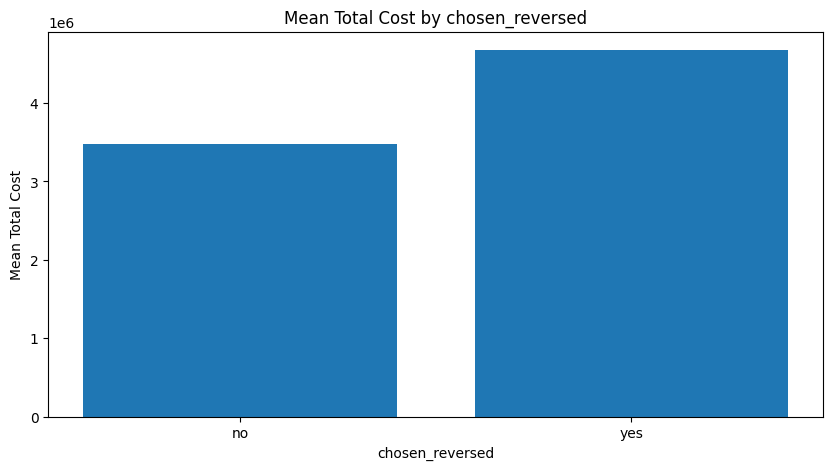

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of the columns for which bar plots are needed
columns_to_plot = [
    'chosen_reversed',
]

# Loop through each column name to extract the value from the series
for column_name in columns_to_plot:
    # Extracting value from the series in each cell and assigning it back
    dataset[column_name] = dataset[column_name].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) and not x.empty else (x if not isinstance(x, pd.Series) else np.nan))

# Loop through each column name to create the bar plots
for column_name in columns_to_plot:
    # Group by the column name and calculate the mean total cost for each unique value
    mean_total_costs = dataset.groupby(column_name).agg({'Total Cost': 'mean'}).reset_index()

    # Plot the bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(mean_total_costs[column_name], mean_total_costs['Total Cost'])
    
    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Mean Total Cost')
    plt.title(f'Mean Total Cost by {column_name}')
    
    # Show plot
    plt.show()


### Index evolution with one type of tactic

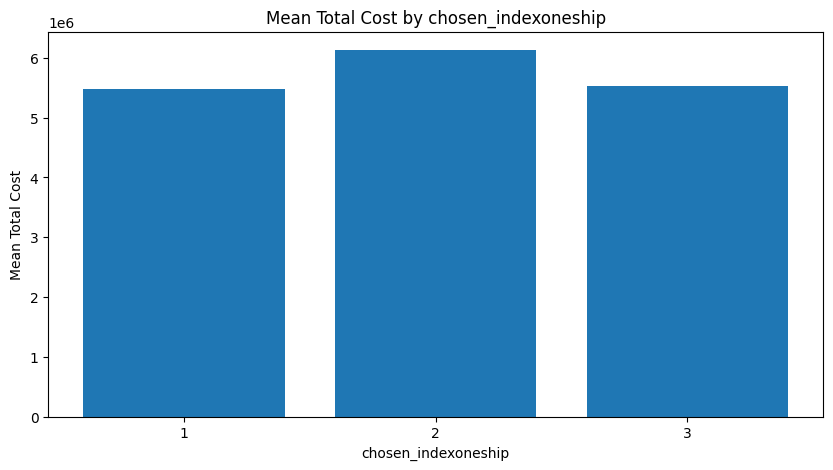

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of the columns for which bar plots are needed
columns_to_plot = [
    "chosen_indexoneship",
]

# Loop through each column name to extract the value from the series
for column_name in columns_to_plot:
    # Extracting value from the series in each cell and assigning it back
    dataset[column_name] = dataset[column_name].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) and not x.empty else (x if not isinstance(x, pd.Series) else np.nan))

# Loop through each column name to create the bar plots
for column_name in columns_to_plot:
    # Group by the column name and calculate the mean total cost for each unique value
    mean_total_costs = dataset[dataset["chosen_tacticoneboat"]=='dist'].groupby(column_name).agg({'Total Cost': 'mean'}).reset_index()

    # Plot the bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(mean_total_costs[column_name], mean_total_costs['Total Cost'])
    
    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Mean Total Cost')
    plt.title(f'Mean Total Cost by {column_name}')
    
    # Show plot
    plt.show()


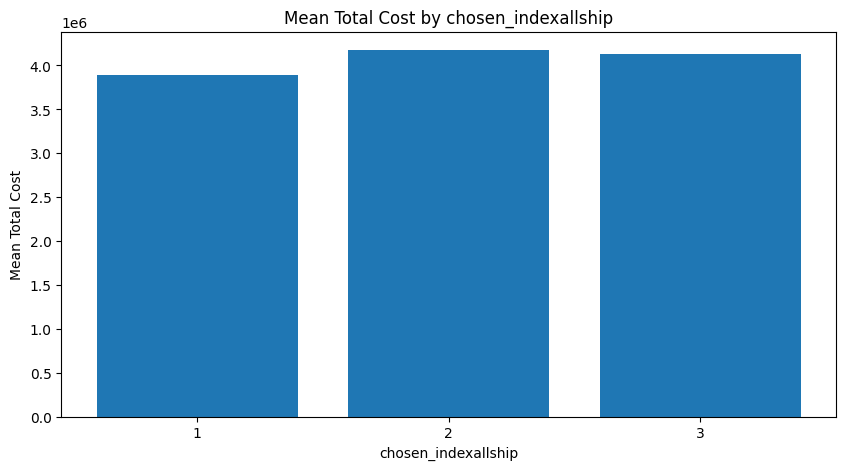

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of the columns for which bar plots are needed
columns_to_plot = [
    "chosen_indexallship",
]

# Loop through each column name to extract the value from the series
for column_name in columns_to_plot:
    # Extracting value from the series in each cell and assigning it back
    dataset[column_name] = dataset[column_name].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) and not x.empty else (x if not isinstance(x, pd.Series) else np.nan))

# Loop through each column name to create the bar plots
for column_name in columns_to_plot:
    # Group by the column name and calculate the mean total cost for each unique value
    mean_total_costs = dataset[dataset["chosen_tacticallboats"]=='dist'].groupby(column_name).agg({'Total Cost': 'mean'}).reset_index()

    # Plot the bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(mean_total_costs[column_name], mean_total_costs['Total Cost'])
    
    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Mean Total Cost')
    plt.title(f'Mean Total Cost by {column_name}')
    
    # Show plot
    plt.show()


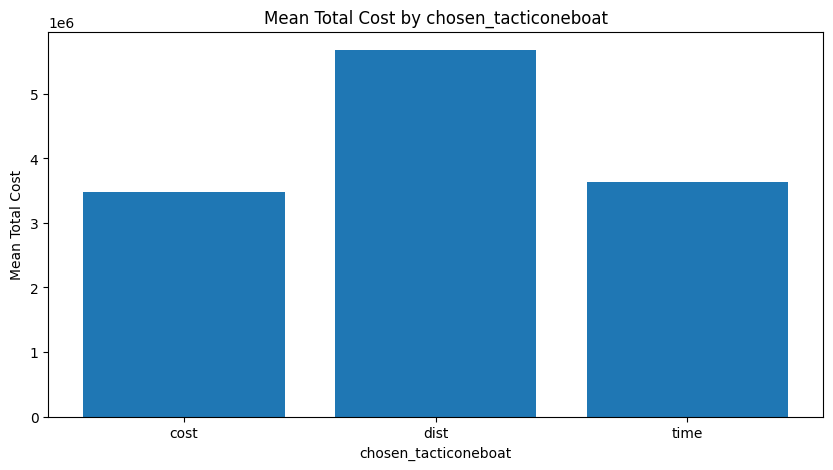

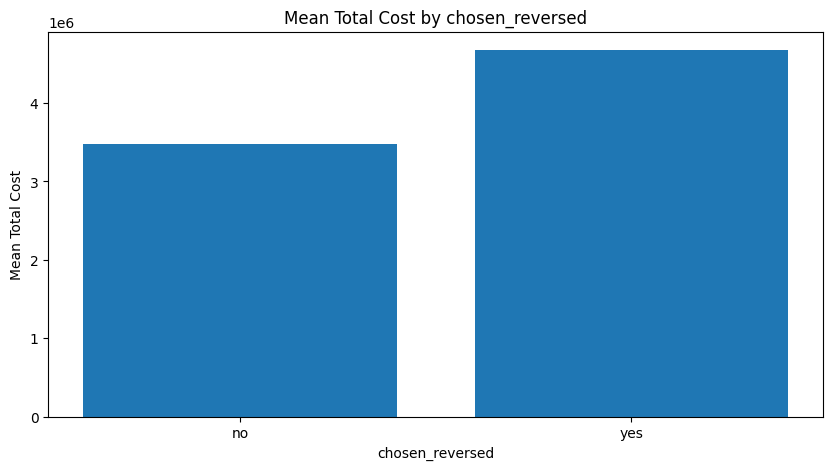

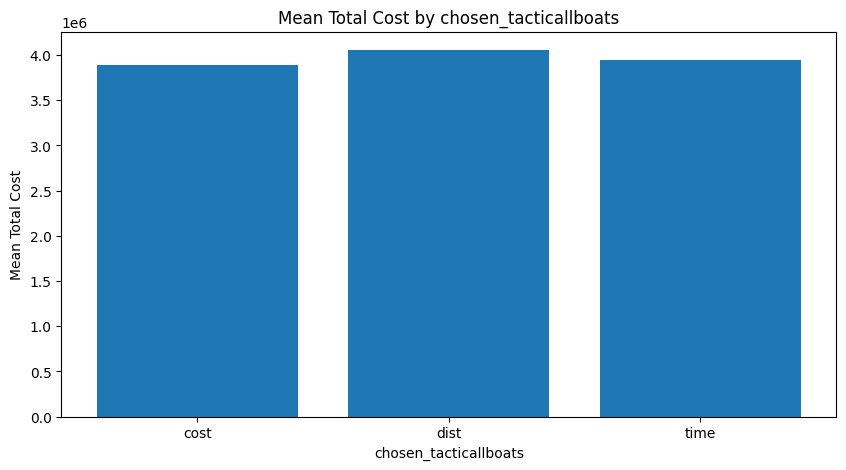

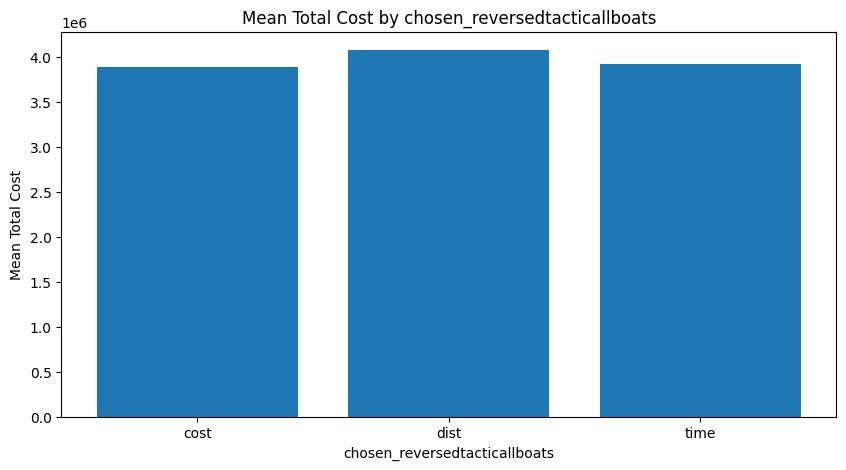

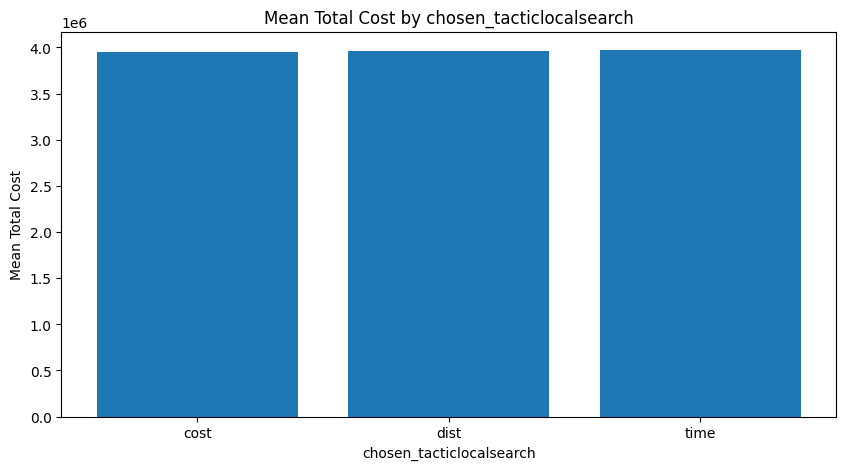

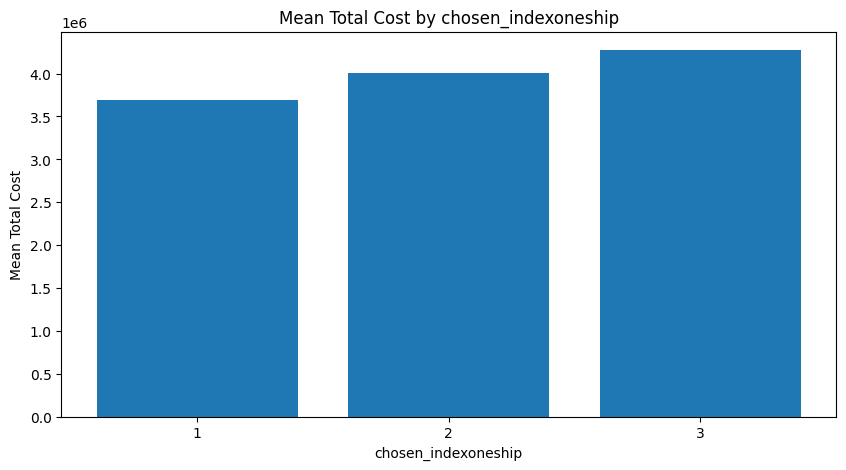

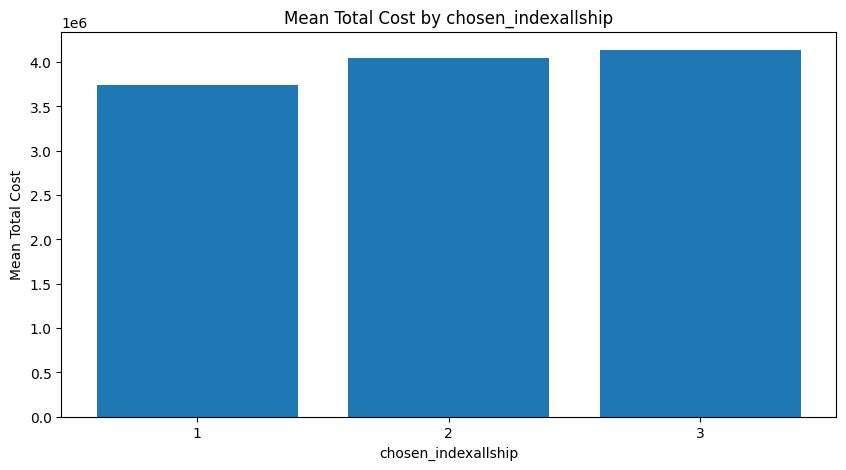

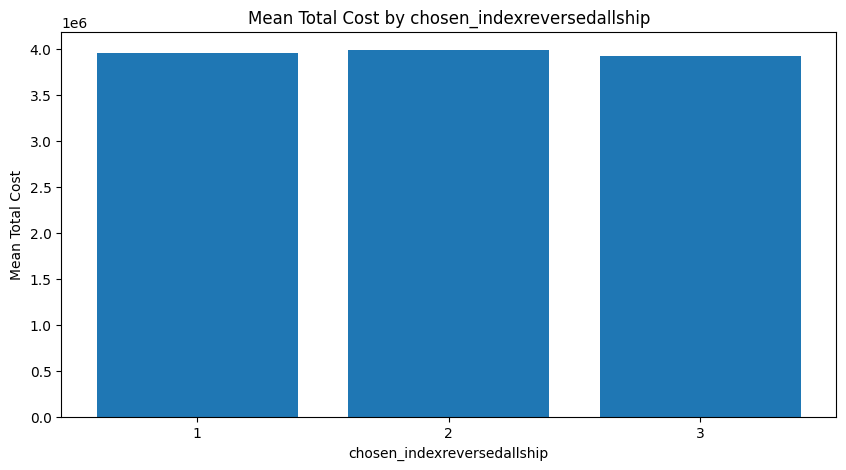

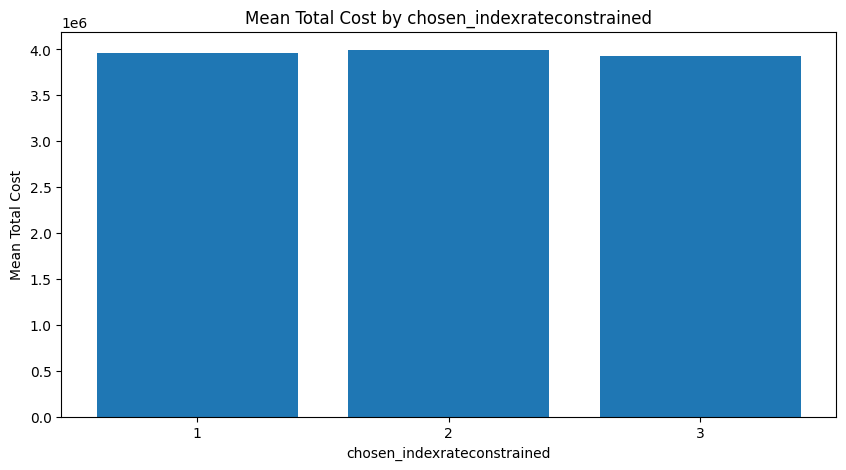

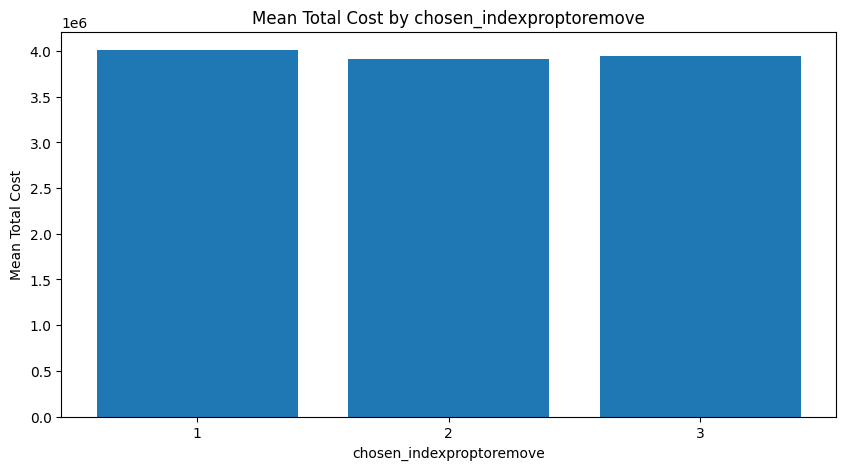

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of the columns for which bar plots are needed
columns_to_plot = [
    "chosen_tacticoneboat",
    "chosen_reversed",
    "chosen_tacticallboats",
    "chosen_reversedtacticallboats",
    "chosen_tacticlocalsearch",
    "chosen_indexoneship",
    "chosen_indexallship",
    "chosen_indexreversedallship",
    "chosen_indexrateconstrained",
    "chosen_indexproptoremove"
]

# Loop through each column name to extract the value from the series
for column_name in columns_to_plot:
    # Extracting value from the series in each cell and assigning it back
    dataset[column_name] = dataset[column_name].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) and not x.empty else (x if not isinstance(x, pd.Series) else np.nan))

# Loop through each column name to create the bar plots
for column_name in columns_to_plot:
    # Group by the column name and calculate the mean total cost for each unique value
    mean_total_costs = dataset.groupby(column_name).agg({'Total Cost': 'mean'}).reset_index()

    # Plot the bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(mean_total_costs[column_name], mean_total_costs['Total Cost'])
    
    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Mean Total Cost')
    plt.title(f'Mean Total Cost by {column_name}')
    
    # Show plot
    plt.show()


In [17]:
dataset.column

Index(['iter', 'inst', 'Total Cost', 'chosen_tacticoneboat', 'chosen_reversed',
       'chosen_tacticallboats', 'chosen_reversedtacticallboats',
       'chosen_tacticlocalsearch', 'chosen_indexoneship',
       'chosen_indexallship', 'chosen_indexreversedallship',
       'chosen_indexrateconstrained', 'chosen_indexproptoremove',
       'cost_solheur', 'delay_cost_solheur', 'waiting_cost_solheur',
       'penalty_solheur', 'handling_cost_solheur', 'fuel_cost_solheur',
       'cost_sollocal', 'Delay Cost', 'Waiting Cost', 'Penalty',
       'Handling Cost', 'Fuel Cost', 'timeheur', 'timelocal',
       'proba_tacticboat', 'proba_tacticall', 'proba_tacticlocalsearch',
       'oneboatdistance', 'oneboatcost', 'oneboattime', 'allboatsdist',
       'allboatstime', 'allboatscost', 'rateconstained', 'failed', 'better',
       'reconstruct', 'pathrelinking', 'usedLocalSearch', 'average_cost_elite',
       'average_dist_elite', 'pushimprove'],
      dtype='object')

### Statistical analysis with machine learning : decision tree :

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

# Select the columns you are interested in
features = [
    "chosen_tacticoneboat",
    #"chosen_reversed",
    "chosen_tacticallboats",
    "chosen_reversedtacticallboats",
    #"chosen_tacticlocalsearch",
    "chosen_indexoneship",
    "chosen_indexallship",
    #"chosen_indexreversedallship",
    "chosen_indexrateconstrained",
    #"chosen_indexproptoremove"
]

for column_name in features:
    # Extracting value from the series in each cell and assigning it back
    dataset[column_name] = dataset[column_name].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) and not x.empty else (x if not isinstance(x, pd.Series) else np.nan))
# Prepare the feature matrix X and target y
X = dataset[features].copy()
y = dataset['Total Cost']

# Initialize a label encoder
le = LabelEncoder()

# Loop over each column and apply the label encoding
for col in X.columns:
    X[col] = le.fit_transform(X[col])

# Initialize and fit the decision tree
model = DecisionTreeRegressor()
model.fit(X, y)

# Print the feature importance
importance_dict = dict(zip(features, model.feature_importances_))
print(importance_dict)


{'chosen_tacticoneboat': 0.5018774069148341, 'chosen_tacticallboats': 0.06809340393997965, 'chosen_reversedtacticallboats': 0.11667972047471994, 'chosen_indexoneship': 0.16115015729095875, 'chosen_indexallship': 0.08536538016198607, 'chosen_indexrateconstrained': 0.0668339312175214}


## Diversity analysis :

In [41]:
dataset['average_dist_elite']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1509    0.0
1510    0.0
1511    0.0
1512    0.0
1513    0.0
Name: average_dist_elite, Length: 1514, dtype: object

ValueError: could not convert string to float: 'None'

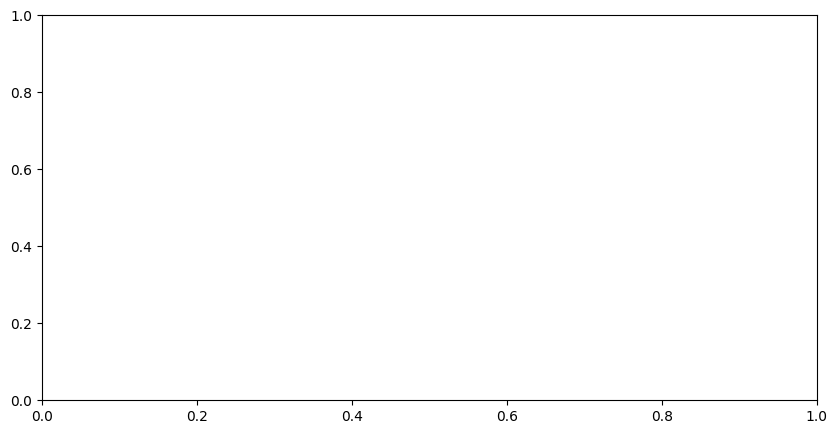

In [35]:
import matplotlib.pyplot as plt

# Plot average_cost_elite
plt.figure(figsize=(10, 5))
plt.plot(dataset['iter'], dataset['average_cost_elite'])
plt.title('Average Cost Elite over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Average Cost Elite')
plt.show()

# Plot average_dist_elite
plt.figure(figsize=(10, 5))
plt.plot(dataset['iter'], dataset['average_dist_elite'])
plt.title('Average Distance Elite over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Average Distance Elite')
plt.show()


## Time analysis

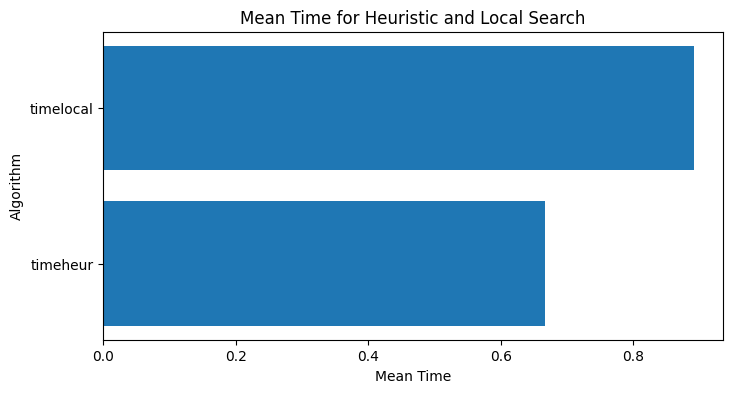

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate mean of timeheur and timelocal across all iterations
mean_timeheur = dataset['timeheur'].mean()
mean_timelocal = dataset['timelocal'].mean()

# plot horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(['timeheur', 'timelocal'], [mean_timeheur, mean_timelocal])
ax.set_xlabel('Mean Time')
ax.set_ylabel('Algorithm')
ax.set_title('Mean Time for Heuristic and Local Search')

plt.show()


### Main ideas from that already : 

- The reactive GRASP is not reactive at all, too much parameters and not enough simulations to update the probabilities.
- The penalty is really difficult to optimize for the greedy heuristic -> goal of the local search. Can we put more focus on that ?
- Regarding the when value, is it enough random ? If we remove some parameters how can implement the reactive GRASP ? Should it be reactive ? Should we for it to be more random ? 
- Add earliest
- Put hard constraint in CPLEX

Given the number of iterations -> difficult to make it reactive, better to have a fix parameters and optimize it. 